In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
import cv2

In [20]:
from cv2 import cv2_imshow

ImportError: cannot import name 'cv2_imshow'

In [15]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
#cv2_imshow(im)

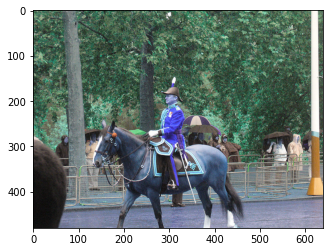

In [27]:
from matplotlib import pyplot as plt
plt.imshow(im)
plt.show()

In [16]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:25, 6.92MB/s]                               
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/Applications/anaconda3/envs/labelimg_workorder/lib/python3.6/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370253951/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [17]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24])
Boxes(tensor([[126.6049, 244.8985, 459.8287, 480.0000],
        [251.1093, 157.8128, 338.9732, 413.6367],
        [114.8497, 268.6858, 148.2354, 398.8107],
        [  0.8217, 281.0327,  78.6073, 478.4209],
        [ 49.3954, 274.1232,  80.1549, 342.9802],
        [561.2246, 271.5818, 596.2748, 385.2532],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9296, 278.3742, 562.2794, 389.3802],
        [335.2410, 251.9167, 414.7491, 275.9375],
        [350.9302, 269.2061, 386.0984, 297.9080],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2655, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5583, 356.8722],
        [506.8766, 283.3257, 529.9404, 324.0391],
        [594.5659, 283.4807, 609.0584, 311.4129]]))


In [23]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2.imshow('',out.get_image()[:, :, ::-1])

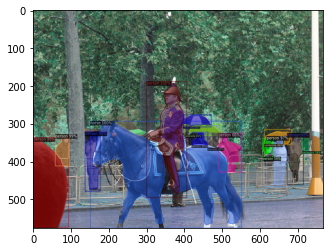

In [29]:
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()